<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



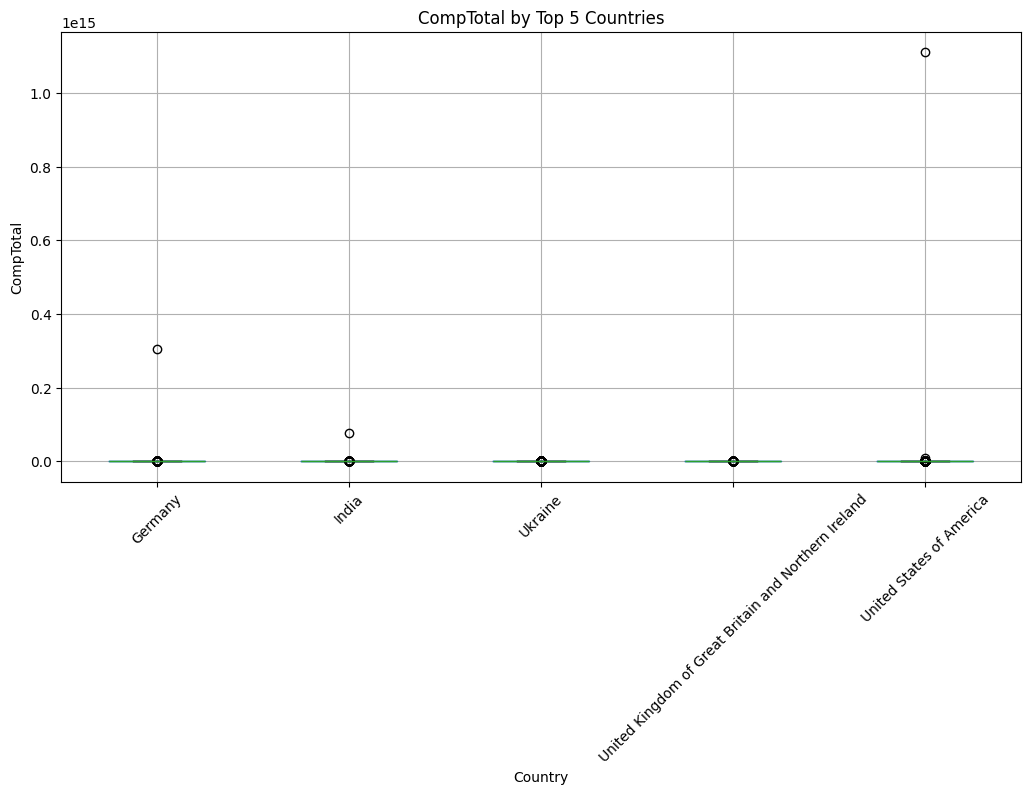

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query country and compensation data, filtering out nulls
query = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Get top 5 countries by number of entries
top5 = df['Country'].value_counts().head(5).index.tolist()

# Filter dataframe for only top 5 countries
df = df[df['Country'].isin(top5)]

# Create box plot of CompTotal by Country
df.boxplot(column='CompTotal', by='Country', figsize=(12,6))
plt.title('CompTotal by Top 5 Countries')
plt.suptitle('')  # Removes the automatic 'Boxplot grouped by Country' title
plt.xticks(rotation=45)
plt.ylabel('CompTotal')
plt.show()

# Close the connection
conn.close()


## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




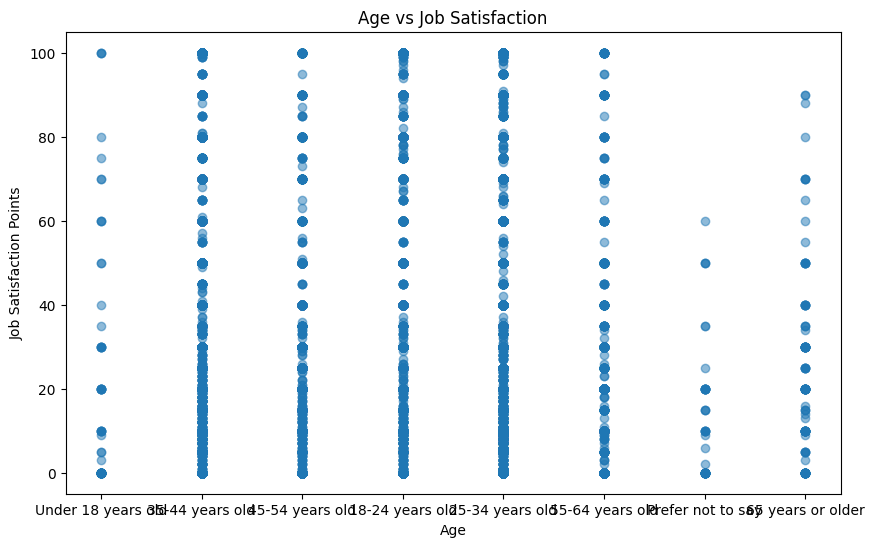

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


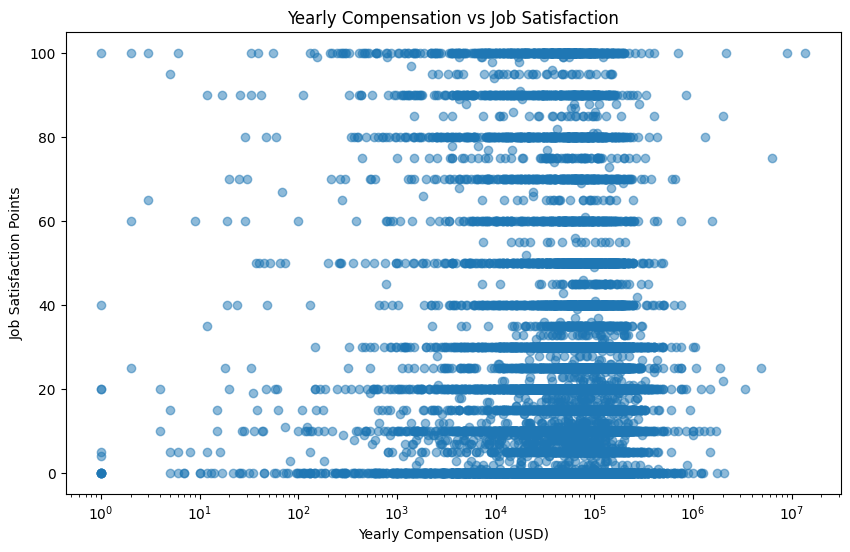

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.xscale('log')  # compensation usually skewed; log scale helps
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


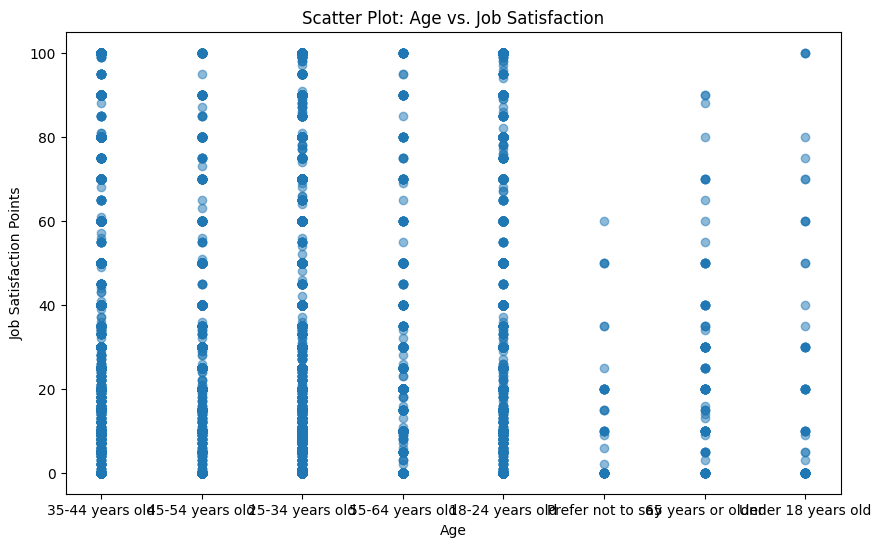

In [9]:
import matplotlib.pyplot as plt

# Filter out rows where either Age or JobSatPoints_6 is missing
df_filtered = df[['Age', 'JobSatPoints_6']].dropna()

x = df_filtered['Age']
y = df_filtered['JobSatPoints_6']

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.title('Scatter Plot: Age vs. Job Satisfaction')
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


Filtered data shape: (0, 2)


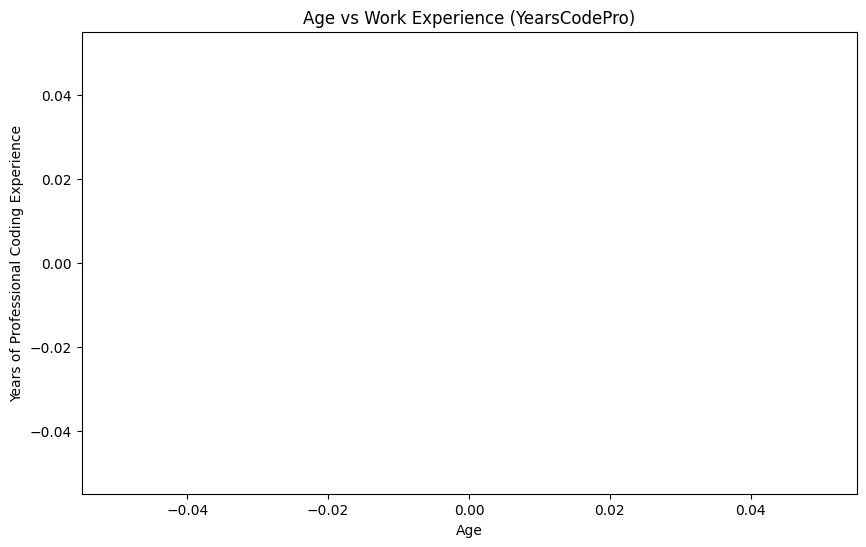

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: assuming df is already loaded

# Function to convert YearsCodePro with special string cases
def convert_experience(x):
    if isinstance(x, str):
        if x.strip() == 'Less than 1 year':
            return 0.5
        elif x.strip() == 'More than 50 years':
            return 51
    try:
        return float(x)
    except:
        return None

# Apply conversion
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Convert Age to numeric (coerce errors to NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows where either is NaN
df_filtered = df[['Age', 'YearsCodePro']].dropna()

print(f"Filtered data shape: {df_filtered.shape}")

# Plot scatter
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Age'], df_filtered['YearsCodePro'], alpha=0.5)
plt.title('Age vs Work Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


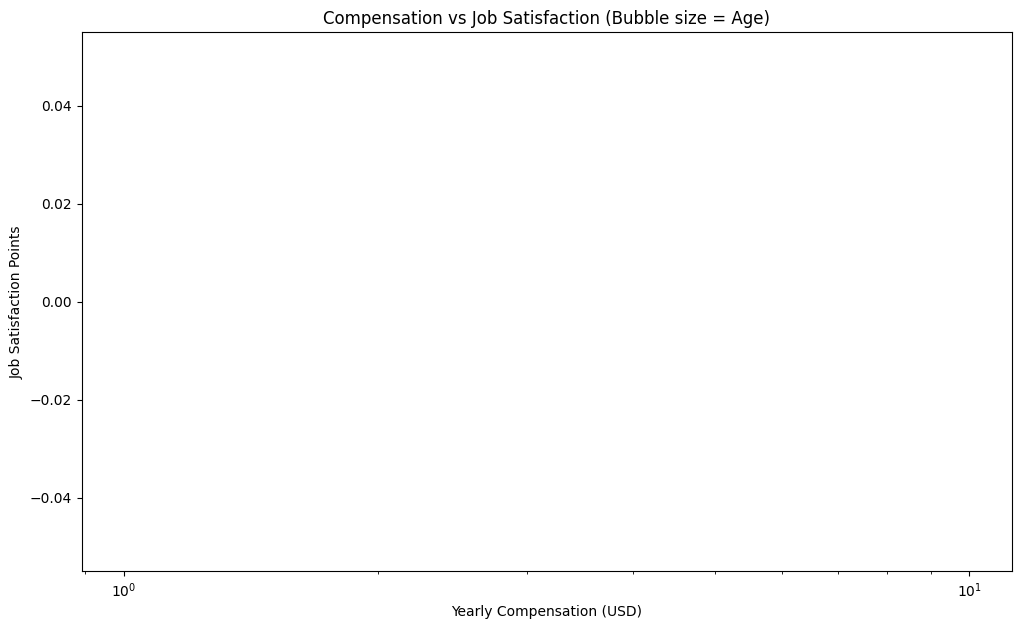

In [13]:
plt.figure(figsize=(12,7))
sizes = (df['Age'] - df['Age'].min() + 1) * 10  # scale bubble sizes, avoid zero
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=sizes, alpha=0.4, c='blue', edgecolors='w', linewidth=0.5)
plt.xscale('log')
plt.title('Compensation vs Job Satisfaction (Bubble size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


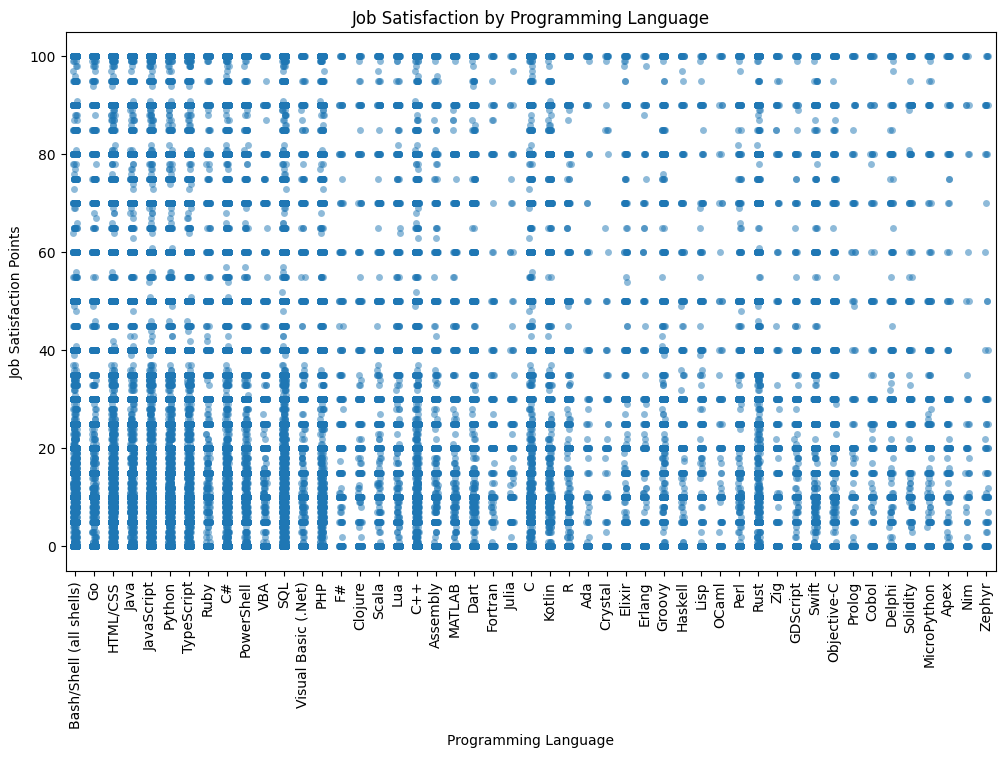

In [14]:
# Filter rows with non-null LanguageHaveWorkedWith and JobSatPoints_6
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()

# Split languages into list
df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

plt.figure(figsize=(12,7))
# Plot jittered scatter plot for better visibility
import seaborn as sns
sns.stripplot(data=df_lang, x='Language', y='JobSatPoints_6', jitter=True, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction Points')
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/var/folders/j1/hh8wblxx5g7000xwt_wbc6xw0000gn/T/ipykernel_6214/1270032441.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(employment_types))


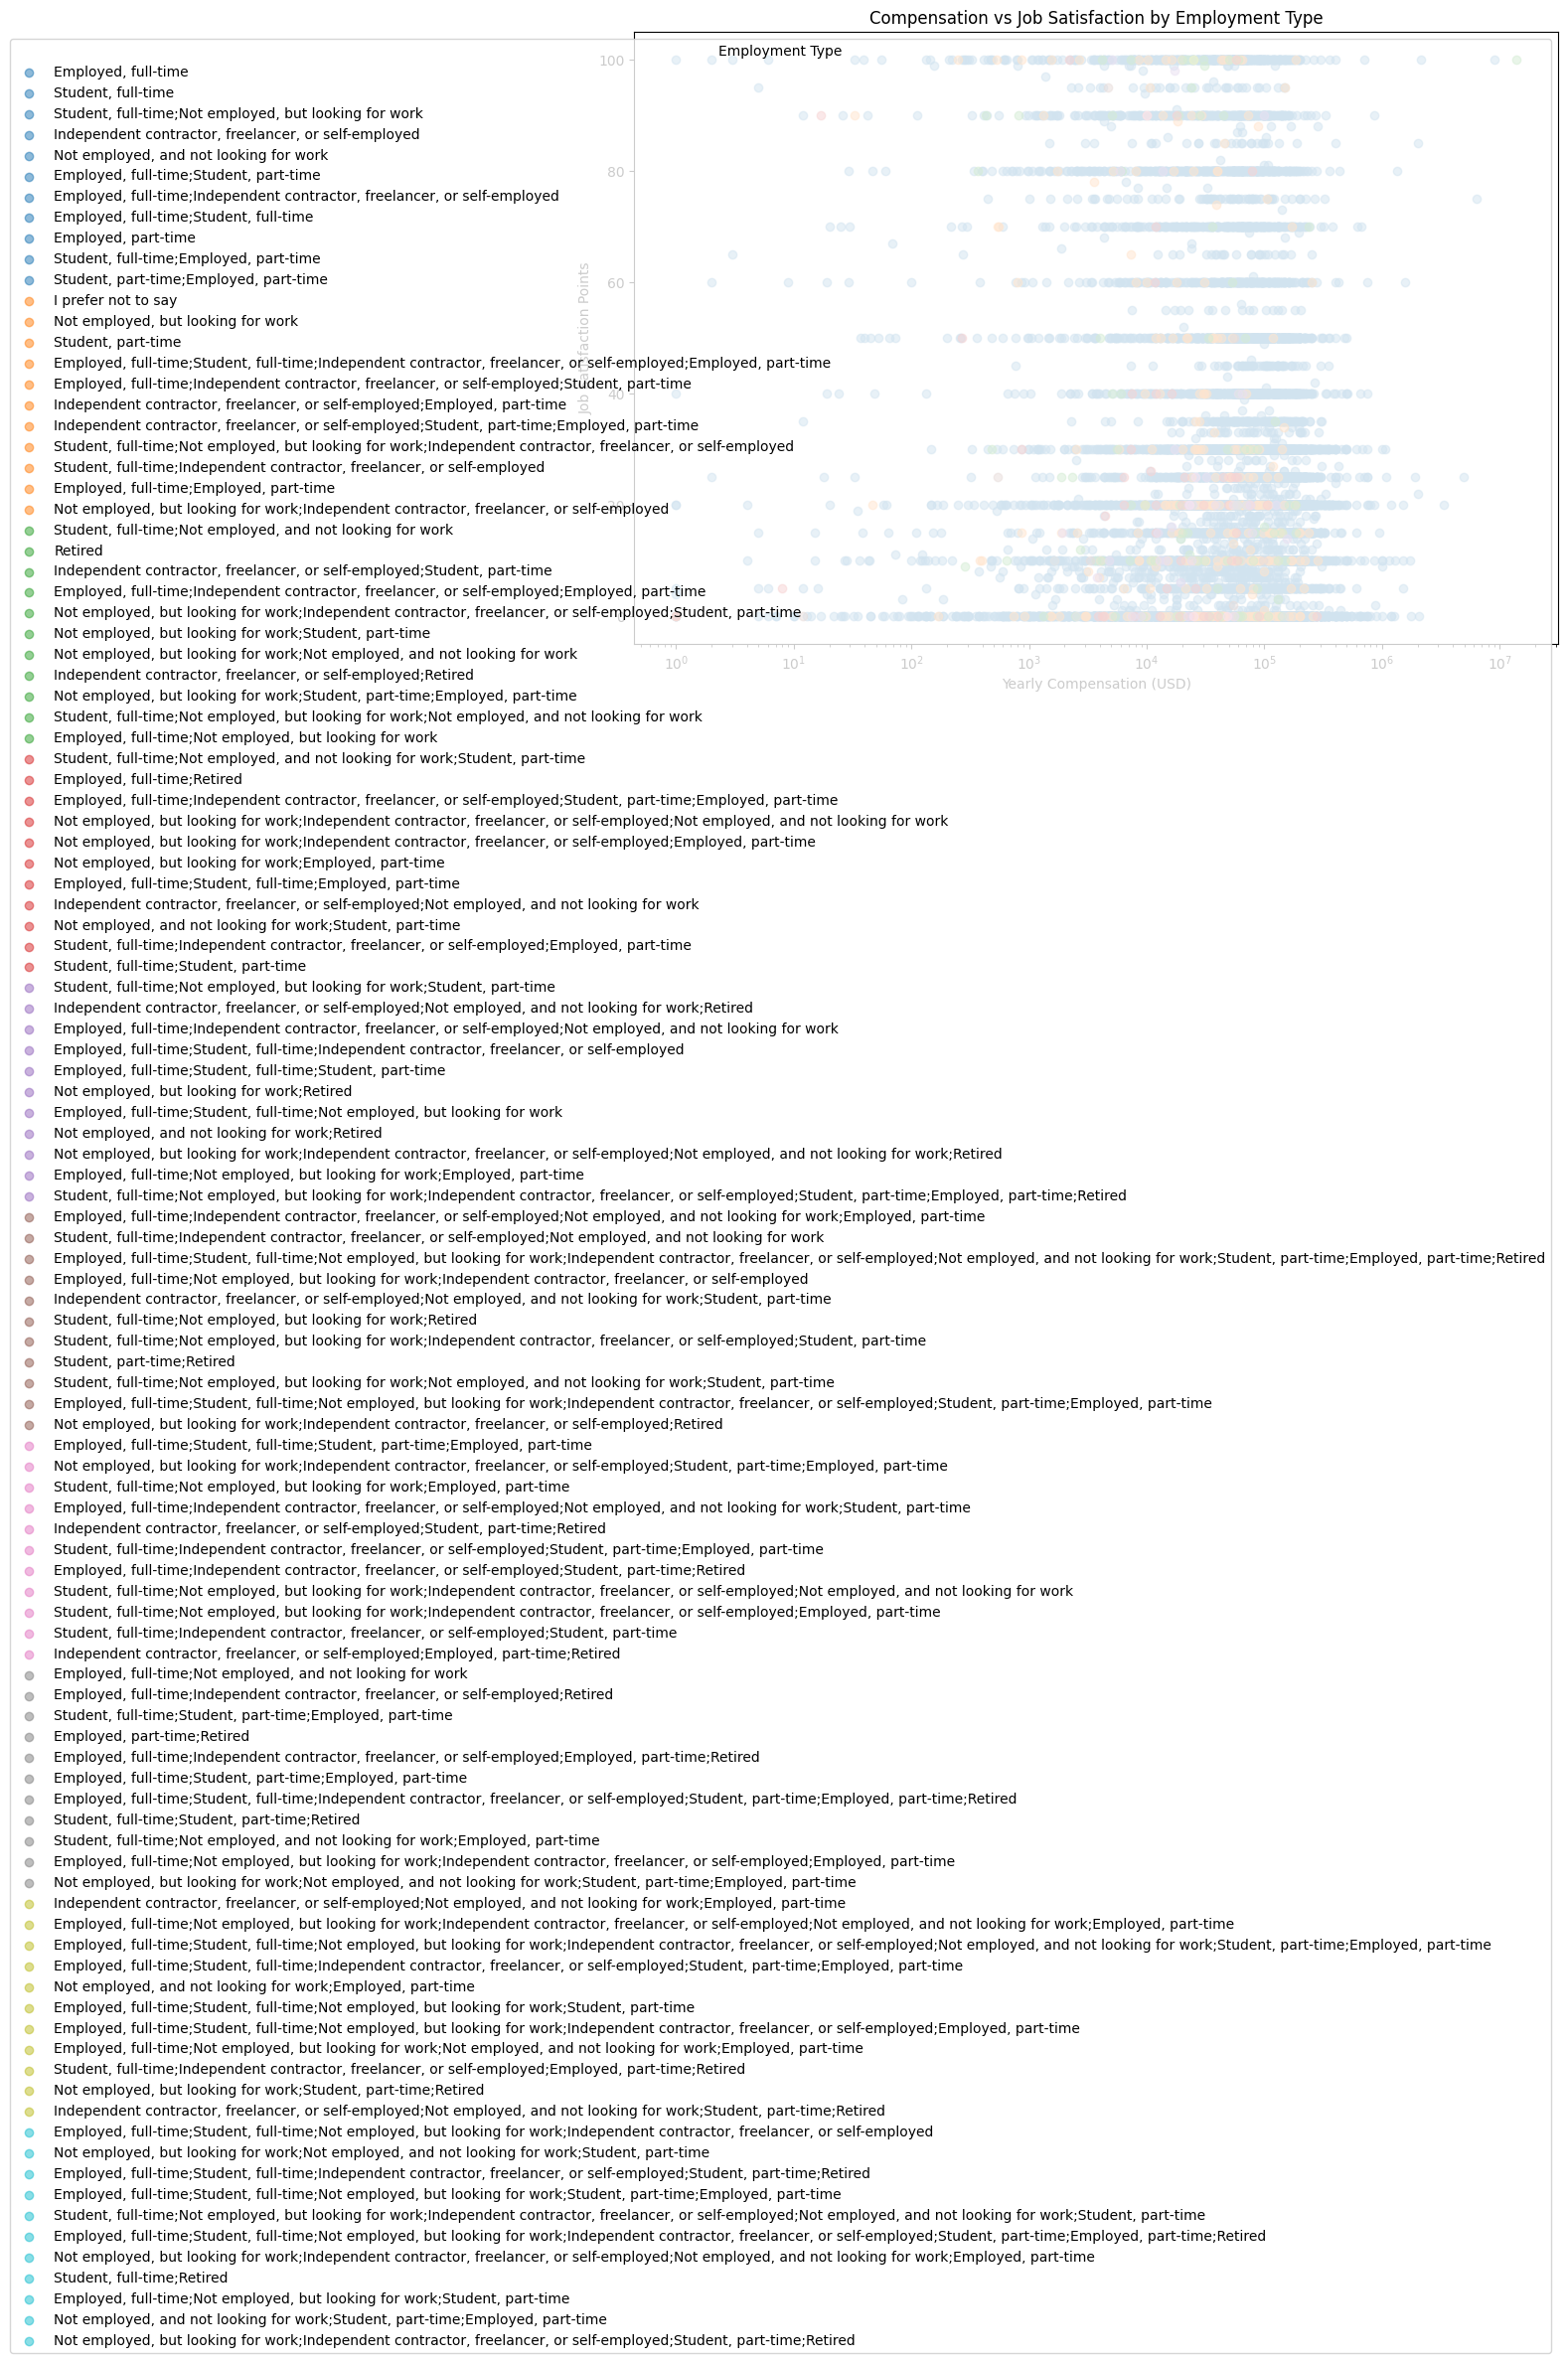

In [15]:
plt.figure(figsize=(12,8))
employment_types = df['Employment'].dropna().unique()
colors = plt.cm.get_cmap('tab10', len(employment_types))

for i, emp in enumerate(employment_types):
    subset = df[df['Employment'] == emp]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], 
                label=emp, alpha=0.5, color=colors(i))
plt.xscale('log')
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.legend(title='Employment Type')
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


No data points to plot!


/var/folders/j1/hh8wblxx5g7000xwt_wbc6xw0000gn/T/ipykernel_6214/3970288825.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')


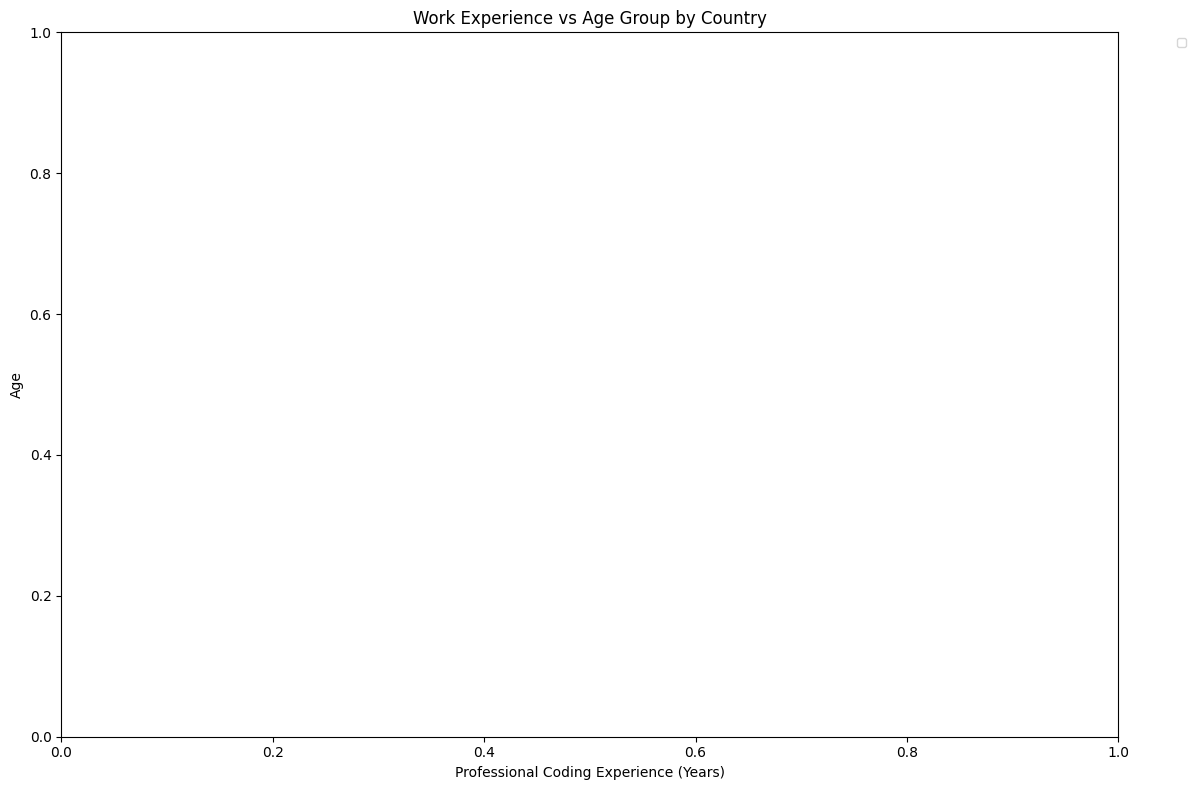

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Data cleaning as before
def convert_experience(x):
    if isinstance(x, str):
        if x.strip() == 'Less than 1 year':
            return 0.5
        elif x.strip() == 'More than 50 years':
            return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'YearsCodePro'])

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12,8))

countries = df['Country'].dropna().unique()
markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'v']

any_points = False  # Flag to check if any points plotted

for i, country in enumerate(countries[:5]):  # limit countries to first 5 for clarity
    for age_group in labels:
        subset = df[(df['Country'] == country) & (df['AgeGroup'] == age_group)]
        print(f'{country} - {age_group}: {len(subset)} points')  # debug print
        if not subset.empty:
            any_points = True
            plt.scatter(subset['YearsCodePro'], subset['Age'], 
                        alpha=0.6, label=f'{country} - {age_group}', 
                        marker=markers[i % len(markers)])

if not any_points:
    print("No data points to plot!")

plt.title('Work Experience vs Age Group by Country')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
